# Panel Plots
We are creating this notebook in order to practice creating panel plots
for Savitzky smoothing method and see how different parameters affect our estimates.

In [1]:
import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial
import datetime
import time
import scipy
import scipy.signal
import os, os.path

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb


import sys
# start_time = time.time()

In [5]:
# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path

####################################################################################
###
###                      Local
###
####################################################################################

################
###
### Core path
###

sys.path.append('/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/')

################
###
### Directories
###
data_dir = "/Users/hn/Documents/01_research_data" + \
           "/remote_sensing/01_NDVI_TS/00_Eastern_WA_withYear/"

param_dir = "/Users/hn/Documents/00_GitHub/Ag/remote_sensing/parameters/"
####################################################################################
###
###                      Aeolus Core path
###
####################################################################################

# sys.path.append('/home/hnoorazar/remote_sensing_codes/')

####################################################################################
###
###                   Aeolus Directories
###
####################################################################################

# data_dir = "/data/hydro/users/Hossein/remote_sensing/01_NDVI_TS/00_Eastern_WA_EE/"
# param_dir = "/home/hnoorazar/remote_sensing_codes/parameters/"

####################################################################################
###
###                   Import remote cores
###
####################################################################################

import remote_sensing_core as rc
import remote_sensing_core as rcp


In [6]:
####################################################################################
###
###      Parameters                   
###
####################################################################################

eleven_colors = ["gray", "lightcoral", "red", "peru",
                 "darkorange", "gold", "olive", "green",
                 "blue", "violet", "deepskyblue"]

Sav_win_size = 9
sav_order = 1
delt = 0.1
irrigated_only = 0
SF_year = 2017
# we are creating panels where each panel
# consist of different parameters of Savitzky, 
# So, we do not need the following two

# Sav_win_size = int(sys.argv[1]) 
# sav_order = int(sys.argv[2])

delt = float(sys.argv[1])
indeks = sys.argv[2]
irrigated_only = int(sys.argv[3])
SF_year = int(sys.argv[4])

print ("delta = {fileShape}".format(fileShape=delt))

delta = 0.1.


In [40]:
####################################################################################
###
###                   process data
###
####################################################################################

f_name = "Eastern_WA_" + str(SF_year) + "_70cloud_selectors.csv"
a_df = pd.read_csv(data_dir + f_name, low_memory=False)

##################################################################
##################################################################
####
####  plots has to be exact. So, we need 
#### to filter out NASS, and filter by last survey date
####
##################################################################
##################################################################

a_df = a_df[a_df['county']== "Grant"] # Filter Grant
a_df = rc.filter_out_NASS(a_df) # Toss NASS
a_df = rc.filter_by_lastSurvey(a_df, year = SF_year) # filter by last survey date

a_df['SF_year'] = SF_year

########################
######################## Do this for now, till you learn
######################## how to plot 2 years where x is DoY 
######################## 

a_df = a_df[a_df['image_year'] == SF_year]

########################
########################

if irrigated_only == True:
    a_df = filter_out_nonIrrigated(a_df)
    output_Irr = "irrigated_only"
else:
    output_Irr = "non_irrigated_only"
    a_df = filter_out_Irrigated(a_df)

In [47]:
######################

# The following columns do not exist in the old data
#
if not('DataSrc' in a_df.columns):
    print ("Data source is being set to NA")
    a_df['DataSrc'] = "NA"

if not('CovrCrp' in a_df.columns):
    print ("Data source is being set to NA")
    a_df['CovrCrp'] = "NA"

if (indeks == "EVI"):
    a_df = rc.initial_clean_EVI(a_df)
else:
    a_df = rc.initial_clean_NDVI(a_df)

a_df.head(2)
an_EE_TS = a_df.copy()

Data source is being set to NA


In [50]:
### List of unique polygons
polygon_list = an_EE_TS['ID'].unique()
print(len(polygon_list))

1768


In [51]:
counter = 0

In [52]:
# for loop here
a_poly = polygon_list[counter]
if (counter%1000 == 0):
    print (counter)
counter += 1
curr_field = an_EE_TS[an_EE_TS['ID']==a_poly].copy()
curr_field.sort_values(by=['image_year', 'doy'], inplace=True)
curr_field.head(2)

################################################################
plant = curr_field['CropTyp'].unique()[0]

# Take care of names, replace "/" and "," and " " by "_"
plant = plant.replace("/", "_")
plant = plant.replace(",", "_")
plant = plant.replace(" ", "_")
plant = plant.replace("__", "_")

county = curr_field['county'].unique()[0]
ID = curr_field['ID'].unique()[0]



In [187]:
X = curr_field['doy']
y = curr_field[indeks]

#############################################
###
###             Smoothen
###
#############################################

# differences are minor, but lets keep using Pythons function
# my_savitzky_pred = rc.savitzky_golay(y, window_size=Sav_win_size, order=sav_order)

SG_pred_31 = scipy.signal.savgol_filter(y, window_length= 3, polyorder=1)
SG_pred_31 = scipy.signal.savgol_filter(y, window_length= 3, polyorder=1)
SG_pred_32 = scipy.signal.savgol_filter(y, window_length= 3, polyorder=2)

SG_pred_51 = scipy.signal.savgol_filter(y, window_length= 5, polyorder=1)
SG_pred_52 = scipy.signal.savgol_filter(y, window_length= 5, polyorder=2)
SG_pred_53 = scipy.signal.savgol_filter(y, window_length= 5, polyorder=3)

SG_pred_71 = scipy.signal.savgol_filter(y, window_length= 7, polyorder=1)
SG_pred_72 = scipy.signal.savgol_filter(y, window_length= 7, polyorder=2)
SG_pred_73 = scipy.signal.savgol_filter(y, window_length= 7, polyorder=3)

SG_pred_91 = scipy.signal.savgol_filter(y, window_length= 9, polyorder=1)
SG_pred_92 = scipy.signal.savgol_filter(y, window_length= 9, polyorder=2)
SG_pred_93 = scipy.signal.savgol_filter(y, window_length= 9, polyorder=3)

In [188]:
preds_df = pd.DataFrame(data = {'SG 31':SG_pred_31, 'SG 32':SG_pred_32, 
                                    'SG 51':SG_pred_51, 'SG 52':SG_pred_52, 'SG 53':SG_pred_53, 
                                    'SG 71':SG_pred_71, 'SG 72':SG_pred_72, 'SG 73':SG_pred_73, 
                                    'SG 91':SG_pred_91, 'SG 92':SG_pred_92, 'SG 93':SG_pred_93}, 
                            index = X)

<Figure size 432x288 with 0 Axes>

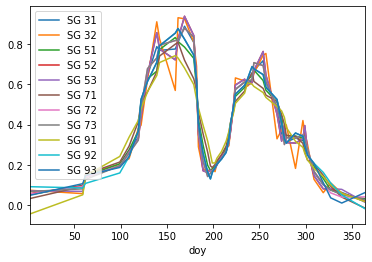

In [189]:
plt.figure();
preds_df.plot();

In [190]:
SG_max_min_31 = rc.my_peakdetect(y_axis=SG_pred_31, x_axis=X, delta=delt);
SG_max_31 =  SG_max_min_31[0]; SG_min_31 =  SG_max_min_31[1];
SG_max_31 = rc.separate_x_and_y(m_list = SG_max_31);
SG_min_31 = rc.separate_x_and_y(m_list = SG_min_31);
SG_max_DoYs_series_31 = pd.Series(SG_max_31[0]);
SG_max_series_31 = pd.Series(SG_max_31[1]);
SG_min_DoYs_series_31 = pd.Series(SG_min_31[0]);
SG_min_series_31 = pd.Series(SG_min_31[1]);


SG_max_min_32 = rc.my_peakdetect(y_axis=SG_pred_32, x_axis=X, delta=delt);
SG_max_32 =  SG_max_min_32[0]; SG_min_32 =  SG_max_min_32[1];
SG_max_32 = rc.separate_x_and_y(m_list = SG_max_32);
SG_min_32 = rc.separate_x_and_y(m_list = SG_min_32);
SG_max_DoYs_series_32 = pd.Series(SG_max_32[0]);
SG_max_series_32 = pd.Series(SG_max_32[1]);
SG_min_DoYs_series_32 = pd.Series(SG_min_32[0]);
SG_min_series_32 = pd.Series(SG_min_32[1]);

############
############ window 5
############

SG_max_min_51 = rc.my_peakdetect(y_axis=SG_pred_51, x_axis=X, delta=delt);
SG_max_51 =  SG_max_min_51[0]; SG_min_51 =  SG_max_min_51[1];
SG_max_51 = rc.separate_x_and_y(m_list = SG_max_51);
SG_min_51 = rc.separate_x_and_y(m_list = SG_min_51);
SG_max_DoYs_series_51 = pd.Series(SG_max_51[0]);
SG_max_series_51 = pd.Series(SG_max_51[1]);
SG_min_DoYs_series_51 = pd.Series(SG_min_51[0]);
SG_min_series_51 = pd.Series(SG_min_51[1]);

SG_max_min_52 = rc.my_peakdetect(y_axis=SG_pred_52, x_axis=X, delta=delt);
SG_max_52 =  SG_max_min_52[0]; SG_min_52 =  SG_max_min_52[1];
SG_max_52 = rc.separate_x_and_y(m_list = SG_max_52);
SG_min_52 = rc.separate_x_and_y(m_list = SG_min_52);
SG_max_DoYs_series_52 = pd.Series(SG_max_52[0]);
SG_max_series_52 = pd.Series(SG_max_52[1]);
SG_min_DoYs_series_52 = pd.Series(SG_min_52[0]);
SG_min_series_52 = pd.Series(SG_min_52[1]);

SG_max_min_53 = rc.my_peakdetect(y_axis=SG_pred_53, x_axis=X, delta=delt);
SG_max_53 =  SG_max_min_53[0]; SG_min_53 =  SG_max_min_53[1];
SG_max_53 = rc.separate_x_and_y(m_list = SG_max_53);
SG_min_53 = rc.separate_x_and_y(m_list = SG_min_53);
SG_max_DoYs_series_53 = pd.Series(SG_max_53[0]);
SG_max_series_53 = pd.Series(SG_max_53[1]);
SG_min_DoYs_series_53 = pd.Series(SG_min_53[0]);
SG_min_series_53 = pd.Series(SG_min_53[1]);

############
############ window 7
############

SG_max_min_71 = rc.my_peakdetect(y_axis=SG_pred_71, x_axis=X, delta=delt);
SG_max_71 =  SG_max_min_71[0]; SG_min_71 =  SG_max_min_71[1];
SG_max_71 = rc.separate_x_and_y(m_list = SG_max_71);
SG_min_71 = rc.separate_x_and_y(m_list = SG_min_71);
SG_max_DoYs_series_71 = pd.Series(SG_max_71[0]);
SG_max_series_71 = pd.Series(SG_max_71[1]);
SG_min_DoYs_series_71 = pd.Series(SG_min_71[0]);
SG_min_series_71 = pd.Series(SG_min_71[1]);

SG_max_min_72 = rc.my_peakdetect(y_axis=SG_pred_72, x_axis=X, delta=delt);
SG_max_72 =  SG_max_min_72[0]; SG_min_72 =  SG_max_min_72[1];
SG_max_72 = rc.separate_x_and_y(m_list = SG_max_72);
SG_min_72 = rc.separate_x_and_y(m_list = SG_min_72);
SG_max_DoYs_series_72 = pd.Series(SG_max_72[0]);
SG_max_series_72 = pd.Series(SG_max_72[1]);
SG_min_DoYs_series_72 = pd.Series(SG_min_72[0]);
SG_min_series_72 = pd.Series(SG_min_72[1]);

SG_max_min_73 = rc.my_peakdetect(y_axis=SG_pred_73, x_axis=X, delta=delt);
SG_max_73 =  SG_max_min_73[0]; SG_min_73 =  SG_max_min_73[1];
SG_max_73 = rc.separate_x_and_y(m_list = SG_max_73);
SG_min_73 = rc.separate_x_and_y(m_list = SG_min_73);
SG_max_DoYs_series_73 = pd.Series(SG_max_73[0]);
SG_max_series_73 = pd.Series(SG_max_73[1]);
SG_min_DoYs_series_73 = pd.Series(SG_min_73[0]);
SG_min_series_73 = pd.Series(SG_min_73[1]);

############
############ window 9
############

SG_max_min_91 = rc.my_peakdetect(y_axis=SG_pred_91, x_axis=X, delta=delt);
SG_max_91 =  SG_max_min_91[0]; SG_min_91 =  SG_max_min_91[1];
SG_max_91 = rc.separate_x_and_y(m_list = SG_max_91);
SG_min_91 = rc.separate_x_and_y(m_list = SG_min_91);
SG_max_DoYs_series_91 = pd.Series(SG_max_91[0]);
SG_max_series_91 = pd.Series(SG_max_91[1]);
SG_min_DoYs_series_91 = pd.Series(SG_min_91[0]);
SG_min_series_91 = pd.Series(SG_min_91[1]);

SG_max_min_92 = rc.my_peakdetect(y_axis=SG_pred_92, x_axis=X, delta=delt);
SG_max_92 =  SG_max_min_92[0]; SG_min_92 =  SG_max_min_92[1];
SG_max_92 = rc.separate_x_and_y(m_list = SG_max_92);
SG_min_92 = rc.separate_x_and_y(m_list = SG_min_92);
SG_max_DoYs_series_92 = pd.Series(SG_max_92[0]);
SG_max_series_92 = pd.Series(SG_max_92[1]);
SG_min_DoYs_series_92 = pd.Series(SG_min_92[0]);
SG_min_series_92 = pd.Series(SG_min_92[1]);

SG_max_min_93 = rc.my_peakdetect(y_axis=SG_pred_93, x_axis=X, delta=delt);
SG_max_93 =  SG_max_min_93[0]; SG_min_93 =  SG_max_min_93[1];
SG_max_93 = rc.separate_x_and_y(m_list = SG_max_93);
SG_min_93 = rc.separate_x_and_y(m_list = SG_min_93);
SG_max_DoYs_series_93 = pd.Series(SG_max_93[0]);
SG_max_series_93 = pd.Series(SG_max_93[1]);
SG_min_DoYs_series_93 = pd.Series(SG_min_93[0]);
SG_min_series_93 = pd.Series(SG_min_93[1]);

In [204]:
plotting_dic = { "SG 31" : [SG_pred_31, SG_max_DoYs_series_31, SG_max_series_31],
                 "SG 32" : [SG_pred_32, SG_max_DoYs_series_32, SG_max_series_32],

                 "SG 51" : [SG_pred_51, SG_max_DoYs_series_51, SG_max_series_51],
                 "SG 52" : [SG_pred_52, SG_max_DoYs_series_52, SG_max_series_52],
                 "SG 53" : [SG_pred_53, SG_max_DoYs_series_53, SG_max_series_53],

                 "SG 71" : [SG_pred_71, SG_max_DoYs_series_71, SG_max_series_71],
                 "SG 72" : [SG_pred_72, SG_max_DoYs_series_72, SG_max_series_72],
                 "SG 73" : [SG_pred_73, SG_max_DoYs_series_73, SG_max_series_73],

                 "SG 91" : [SG_pred_91, SG_max_DoYs_series_91, SG_max_series_91],
                 "SG 92" : [SG_pred_92, SG_max_DoYs_series_92, SG_max_series_92],
                 "SG 93" : [SG_pred_93, SG_max_DoYs_series_93, SG_max_series_93]
}

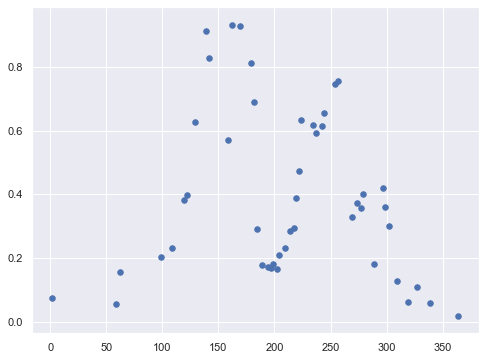

In [219]:
plot_title = county + ", " + plant + ", " + str(SF_year) + " (" + ID + ")"
# sb.set();
fig, ax = plt.subplots(figsize=(8,6));
ax.scatter(X, y, label="Data", s=30);

In [220]:
for co, ite in enumerate(plotting_dic):
    ax.plot(X, plotting_dic[ite][0], label = ite)
    ax.scatter(plotting_dic[ite][1], plotting_dic[ite][2], s=100, marker='*');
    

In [243]:
# ax.set_title(plot_title);
# ax.set(xlabel='DoY', ylabel=indeks)
# ax.legend(loc="best");
# fig

In [227]:
fig_name = "/Users/hn/Desktop/" + county + "_" + plant + "_" + str(SF_year) + "_" + str(counter) + '.png'

In [234]:
plt.show()
plt.savefig(fname = fig_name, \
                         dpi=300,
                         bbox_inches='tight')
plt.close()

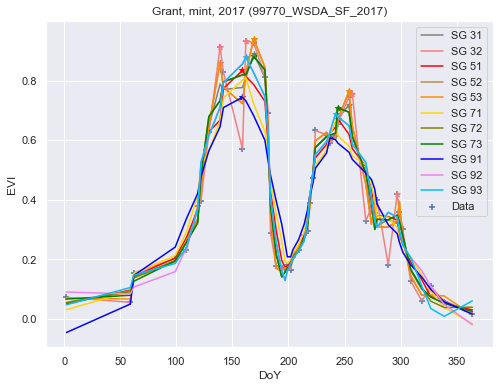

In [251]:
fig, ax = plt.subplots(figsize=(8,6));
ax.scatter(X, y, label="Data", s=30, marker='+');

for co, ite in enumerate(plotting_dic):
    ax.plot(X, plotting_dic[ite][0], label = ite, c = eleven_colors[co])
    ax.scatter(plotting_dic[ite][1], plotting_dic[ite][2], marker='*', c= eleven_colors[co]);

ax.set_title(plot_title);
ax.set(xlabel='DoY', ylabel=indeks)

################################################
#
#    bare soil indices plots
#

# an_EE_TS_BSI = rc.initial_clean(df = curr_field, column_to_be_cleaned='BSI')
# # an_EE_TS_NDWI = rc.initial_clean(df = curr_field, column_to_be_cleaned='NDWI')
# an_EE_TS_PSRI = rc.initial_clean(df = curr_field, column_to_be_cleaned='PSRI')
# an_EE_TS_LSWI = rc.initial_clean(df = curr_field, column_to_be_cleaned='LSWI')

# ax.plot(an_EE_TS_BSI['doy'], an_EE_TS_BSI['BSI'], label="BSI")
# # ax.plot(x_NDWI, y_NDWI, label="NWDI")

# ax.plot(an_EE_TS_PSRI['doy'], an_EE_TS_PSRI['PSRI'], label="PSRI")
# ax.plot(an_EE_TS_LSWI['doy'], an_EE_TS_LSWI['LSWI'], label="LSWI")

ax.legend(loc="best");
plt.savefig(fname = fig_name, \
            dpi=300,
            bbox_inches='tight')

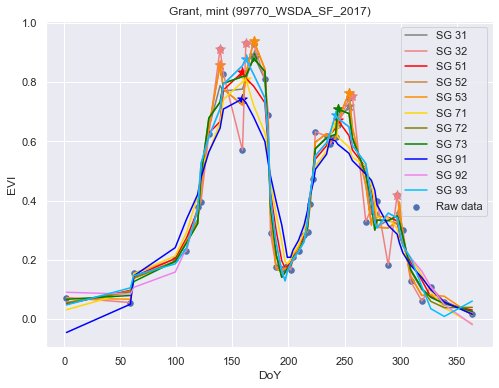

In [271]:
F_1 = subplots_savitzky(current_field = curr_field, deltA = 0.1 )

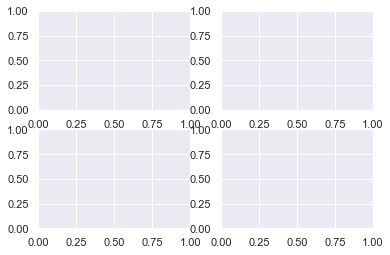

In [264]:
fig, axs = plt.subplots(2, 2)
axs[0, 0] = F_1
axs[0, 1] = F_1
axs[1, 0] = F_1
axs[1, 1] = F_1

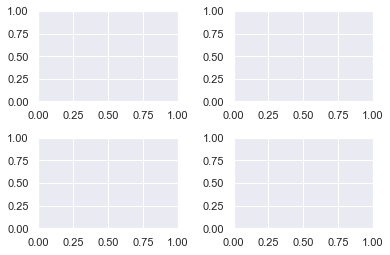

In [277]:
fig = plt.figure()

fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)

ax = fig.add_subplot(2, 2, 2)

ax = fig.add_subplot(2, 2, 3)

ax = fig.add_subplot(2, 2, 4)


In [280]:
type(F_1)

matplotlib.figure.Figure

In [237]:
# fig, axes = plt.subplots(ncols=7, nrows=4)

# for i, ax in enumerate(axes.flatten()):
#     x = np.random.randint(-5, 5, 20)
#     y = np.random.randint(-5, 5, 20)
#     ax.scatter(x, y)
#     ax.set_title('Axis {}'.format(i))

# plt.tight_layout()

In [288]:
f2_ax1

In [289]:
spec2[0, 0]

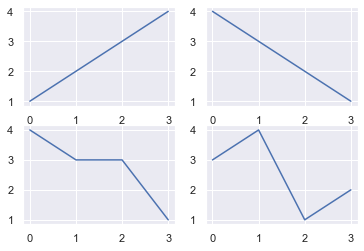

In [297]:
def compare(data, fig, rows, cols ):
    for i in range (0,len(data)):
        plt.figure(fig)
        plt.subplot(rows, cols, i+1)
        plt.plot(data[i])
    return

d1 = [1, 2, 3, 4]
d2 = [4, 3, 2, 1]
d3 = [4, 3, 3, 1]
d4 = [3, 4, 1, 2]
data = [d2,d1,d4]

# compare 4 horizontally
compare([d1, d2, d3, d4], fig=1, rows=2, cols=2)

# # compare 4 vertically
# compare([d1, d2, d3, d4], fig=2, rows=4, cols=1)
# # compare 2 vertically
# compare([d2, d3], fig=3, rows=2, cols=1)
# # compare 3 horizontally
# compare([d1, d2, d4], fig=4, rows=1, cols=3)
# # compare 3 vertically
# compare(data, fig=5, rows=3, cols=1)
# plt.tight_layout()
# plt.show()

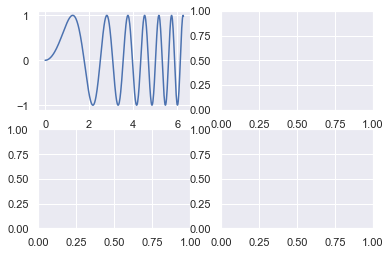

In [301]:
figure, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(x, y)

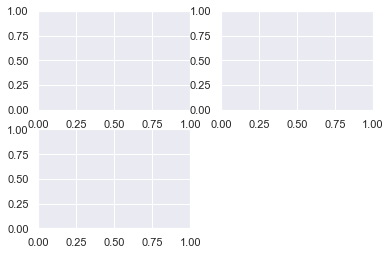

In [322]:
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax = fig.add_subplot(2,2,2)
ax = fig.add_subplot(2,2,3)

In [337]:
import matplotlib
rectt = 10, 10, 10, 10
matplotlib.axes.Axes(fig = F_1, rect = rectt )


Text(0.5, 1.0, 'subplots')

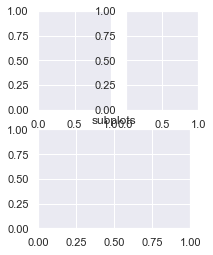

In [338]:
fig = plt.figure()
fig.add_subplot(241)
fig.add_subplot(242)
ax = fig.add_subplot(223)
ax.set_title("subplots")

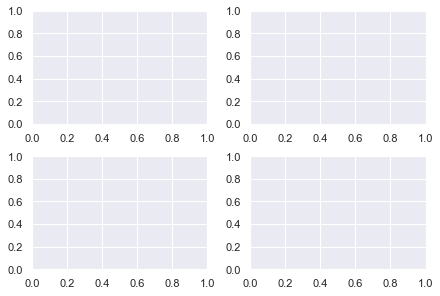

In [352]:
import matplotlib.gridspec as gridspec
fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)

f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])

AttributeError: can't set attribute

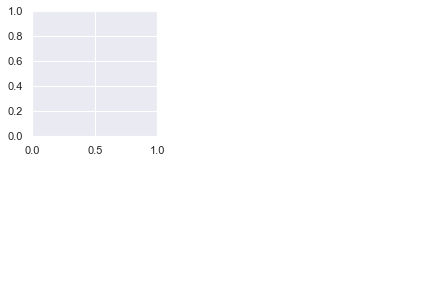

In [359]:
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)
ax = fig.add_subplot(gs[0, 0])
ax.add_image(F_1)

In [360]:
type(F_1)

matplotlib.figure.Figure

In [364]:
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("outputFuck.pdf")
for countt in range(1, 4):
    pdf.savefig( F_1 )
pdf.close()

In [365]:
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("outputFuckMe.pdf")
pdf.savefig( F_1 )
pdf.savefig( F_1 )
pdf.savefig( F_1 )
pdf.savefig( F_1 )
pdf.close()

In [374]:
fig_name = plot_path + county + "_" + plant + "_SF_year_" + str(SF_year) + "_" + str(counter) + '.pdf'
pdf = matplotlib.backends.backend_pdf.PdfPages(fig_name)
pdf.savefig( F_1 )
pdf.savefig( F_1 )
pdf.savefig( F_1 )
pdf.savefig( F_1 )
pdf.close() 

In [371]:
plant

'mint'